# Gradient Descent 과제
- updated 1025

#### 1. Simple linear regression 시각화
 - epoch이 증가함에 따라 m,c 가 변하는 추이를 볼 수 있도록 y = mx+c 그래프가 바뀌는 모습을 애니메이션 형태로 표현할 것  
 scatter plot 과 함께 그릴 것  
 
#### 2. Multiple linear regression 구현
 - X = [attenedance, homework, midterm], y=score 일 때 multiple linear regression 을 vectorized GD 로 구현할 것.  
 - ls의 값과 계산된 parameter 값들을 비교할 것.  
 - epoch이 증가함에 따른 parameter의 추이를 보여줄 것.  

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
cd /content/drive/My Drive/T-I-L

/content/drive/My Drive/T-I-L


In [6]:
!pip install celluloid

In [8]:
# ready
import numpy as np
import pandas as pd

import statsmodels.api as sm

import matplotlib.pyplot as plt
plt.style.use('seaborn')
import time

# gif
from IPython.display import HTML
from celluloid import Camera
from moviepy.editor import *

Imageio: 'ffmpeg-linux64-v3.3.1' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg-linux64-v3.3.1 (43.8 MB)
Downloading: 8192/45929032 bytes (0.0%)688128/45929032 bytes (1.5%)1908736/45929032 bytes (4.2%)3604480/45929032 bytes (7.8%)5996544/45929032 bytes (13.1%)9355264/45929032 bytes (20.4%)12869632/45929032 bytes (28.0%)16695296/45929032 bytes (36.4%)20389888/45929032 bytes (44.4%)23887872/45929032 bytes (52.0%)27500544/45929032 bytes (59.9%)31424512/45929032 bytes (68.4%)35168256/45929032 bytes (76.6%)38961152/

### Load data

In [18]:
data = pd.read_excel('db_score.xlsx')
X = data['midterm']
y = data['score']

### step2) y = mx+c

* naive GD

In [19]:
# y = mx + c

def gradient_descent_naive(X, y):

    # setting
    epochs = 100000
    min_grad = 0.0001      # 최소 gradient 값
    learning_rate = 0.001
    m = 0.0
    c = 0.0
    n = len(y)
    
    c_grad = 0.0
    m_grad = 0.0
    
    # roop
    for epoch in range(epochs):
        
        for i in range(n):
            y_pred = m * X[i] + c
            m_grad += 2*(y_pred-y[i]) * X[i]
            c_grad += 2*(y_pred - y[i])

        c_grad /= n
        m_grad /= n
        
        m = m - learning_rate * m_grad
        c = c - learning_rate * c_grad
        
        if ( epoch % 1000 == 0):
            print("epoch %d: m_grad=%f, c_grad=%f, m=%f, c=%f" %(epoch, m_grad, c_grad, m, c) )   
        
        if ( abs(m_grad) < min_grad and abs(c_grad) < min_grad ):
            break
        
    return m, c

start_time = time.time()
m, c = gradient_descent_naive(X, y)
end_time = time.time()

print("%f seconds" %(end_time - start_time))

print("\n\nFinal:")
print("gdn_m=%f, gdn_c=%f" %(m, c) )
#print("ls_m=%f, ls_c=%f" %(ls_m, ls_c) )

epoch 0: m_grad=-3227.859378, c_grad=-128.088261, m=3.227859, c=0.128088
epoch 1000: m_grad=0.153812, c_grad=-4.030093, m=2.439509, c=4.574169
epoch 2000: m_grad=0.125454, c_grad=-3.287082, m=2.300372, c=8.219775
epoch 3000: m_grad=0.102325, c_grad=-2.681057, m=2.186887, c=11.193257
epoch 4000: m_grad=0.083460, c_grad=-2.186762, m=2.094324, c=13.618531
epoch 5000: m_grad=0.068072, c_grad=-1.783598, m=2.018827, c=15.596667
epoch 6000: m_grad=0.055522, c_grad=-1.454764, m=1.957249, c=17.210103
epoch 7000: m_grad=0.045286, c_grad=-1.186555, m=1.907024, c=18.526077
epoch 8000: m_grad=0.036937, c_grad=-0.967795, m=1.866058, c=19.599430
epoch 9000: m_grad=0.030127, c_grad=-0.789367, m=1.832646, c=20.474894
epoch 10000: m_grad=0.024572, c_grad=-0.643835, m=1.805393, c=21.188952
epoch 11000: m_grad=0.020042, c_grad=-0.525134, m=1.783165, c=21.771362
epoch 12000: m_grad=0.016347, c_grad=-0.428317, m=1.765035, c=22.246396
epoch 13000: m_grad=0.013333, c_grad=-0.349350, m=1.750247, c=22.633850
ep

* descent GD

In [20]:
def gradient_descent_vectorized(X, y):
    
    # setting
    epochs = 100000
    min_grad = 0.0001
    learning_rate = 0.001
    m = 0.0
    c = 0.0
    n = len(y)
    
    c_grad = 0.0
    m_grad = 0.0
    
    coef = []
    intercept = []

    for epoch in range(epochs):    
    
        y_pred = m * X + c
        m_grad = (2*(y_pred - y)*X).sum()/n
        c_grad = (2 * (y_pred - y)).sum()/n
        
        m = m - learning_rate * m_grad
        c = c - learning_rate * c_grad        

        if ( epoch % 1000 == 0):
            print("epoch %d: m_grad=%f, c_grad=%f, m=%f, c=%f" %(epoch, m_grad, c_grad, m, c) )
            coef.append(m); intercept.append(c)
    
        if ( abs(m_grad) < min_grad and abs(c_grad) < min_grad ):
            break

    return m, c, coef, intercept

start_time = time.time()
m, c, coef, intercept = gradient_descent_vectorized(X, y)
end_time = time.time()

print("%f seconds" %(end_time - start_time))

print("\n\nFinal:")
print("gdv_m=%f, gdv_c=%f" %(m, c) )
#print("ls_m=%f, ls_c=%f" %(ls_m, ls_c) )

epoch 0: m_grad=-3227.859378, c_grad=-128.088261, m=3.227859, c=0.128088
epoch 1000: m_grad=0.152477, c_grad=-3.995112, m=2.441183, c=4.530306
epoch 2000: m_grad=0.124641, c_grad=-3.265779, m=2.303106, c=8.148144
epoch 3000: m_grad=0.101887, c_grad=-2.669590, m=2.190235, c=11.105523
epoch 4000: m_grad=0.083287, c_grad=-2.182239, m=2.097970, c=13.523012
epoch 5000: m_grad=0.068082, c_grad=-1.783857, m=2.022548, c=15.499174
epoch 6000: m_grad=0.055653, c_grad=-1.458203, m=1.960895, c=17.114574
epoch 7000: m_grad=0.045494, c_grad=-1.191998, m=1.910497, c=18.435073
epoch 8000: m_grad=0.037188, c_grad=-0.974391, m=1.869300, c=19.514506
epoch 9000: m_grad=0.030399, c_grad=-0.796510, m=1.835623, c=20.396882
epoch 10000: m_grad=0.024850, c_grad=-0.651102, m=1.808094, c=21.118175
epoch 11000: m_grad=0.020313, c_grad=-0.532239, m=1.785591, c=21.707790
epoch 12000: m_grad=0.016605, c_grad=-0.435075, m=1.767196, c=22.189768
epoch 13000: m_grad=0.013574, c_grad=-0.355650, m=1.752159, c=22.583757
ep

### step3) Visualize
### 1. Simple linear regression 시각화¶
epoch이 증가함에 따라 m,c 가 변하는 추이를 볼 수 있도록 y = mx+c 그래프가 바뀌는 모습을 애니메이션 형태로 표현할 것
scatter plot 과 함께 그릴 것

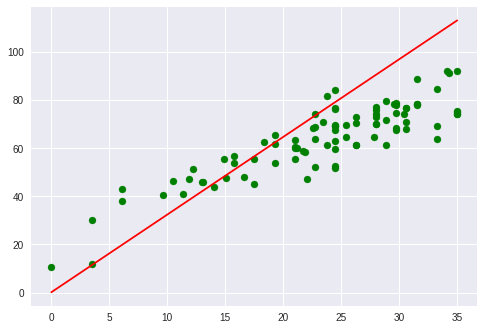

In [21]:
# Visualize
fig, axes = plt.subplots()
camera = Camera(fig)

for i in range(len(coef)):
    y_pred = coef[i]*X + intercept[i]
    axes.scatter(X, y, color='green')
    axes.plot([min(X),max(X)], [min(y_pred), max(y_pred)], color='red')
    plt.show()
    camera.snap()

In [22]:
# Save animation
animation = camera.animate(interval=300, repeat=True)
HTML(animation.to_html5_video())

animation.save('animation_lr.mp4')

clip = (VideoFileClip('animation_lr.mp4').speedx(2))
clip.write_gif('animation_lr.gif')


[MoviePy] Building file animation_lr.gif with imageio


100%|██████████| 27/27 [00:01<00:00, 26.66it/s]


gif moviepy 설치가 안되는 이슈때문에 colab 에서 만듦 - 1026


### step4) Multiple linear regression
### 2. Multiple linear regression 구현  
X = [attenedance, homework, midterm], y=score 일 때 multiple linear regression 을 vectorized GD 로 구현할 것.  
ls의 값과 계산된 parameter 값들을 비교할 것.  
epoch이 증가함에 따른 parameter의 추이를 보여줄 것.  

In [ ]:
# db to python
# database to python

sql = "select * from db_score"
def load_db_data(sql):
    conn = pymysql.connect(host='localhost', user='root', password='1234', db='university')
    curs = conn.cursor(pymysql.cursors.DictCursor)
    #sql = "select * from db_score"
    
    curs.execute(sql)

    data  = curs.fetchall()
    
    curs.close()
    conn.close()
    
    X = [ (t['attendance'], t['homework'], t['midterm'] ) for t in data ]
    #X = [ ( t['midterm'] ) for t in data ]
    X = np.array(X)
    
    y = [ (t['score']) for t in data]
    y = np.array(y)

    return X, y

X,y = load_db_data(sql)

In [ ]:
def gradient_descent_vectorized(X, y):
    
    # setting
    epochs = 10000000
    min_grad = 0.00001
    learning_rate = 0.001
    # parameter
    m1 = 0.0; m2 = 0.0; m3 = 0.0
    c = 0.0
    n = len(y)
    
    c_grad = 0.0
    m1_grad = 0.0; m2_grad = 0.0; m3_grad = 0.0
    
    coef = []
    intercept = []

    for epoch in range(epochs):    
    
        # X (array) -> attenedance, homework, midterm
        X1, X2, X3 = X[:,0], X[:,1], X[:,2]
        
        y_pred = m1*X1 + m2*X2 + m3*X3 + c
        
        m1_grad = (2*(y_pred - y)*X1).sum()/n
        m2_grad = (2*(y_pred - y)*X2).sum()/n
        m3_grad = (2*(y_pred - y)*X3).sum()/n
        
        c_grad = (2 * (y_pred - y)).sum()/n
        
        m1 = m1 - learning_rate * m1_grad
        m2 = m2 - learning_rate * m2_grad
        m3 = m3 - learning_rate * m3_grad
        
        c = c - learning_rate * c_grad        

        if ( epoch % 100000 == 0):
            print(f"epoch {epoch}: m1_grad={m1_grad}, m2_grad={m2_grad}, m3_grad={m3_grad},c_grad={c_grad},m1={m1},m1={m2},m1={m3},c={c}")
            coef.append([m1,m2,m3]); intercept.append(c)
    
#         if ( abs(m_grad) < min_grad and abs(c_grad) < min_grad ):
#             break
                  
        if ( any([abs(m1_grad),abs(m2_grad),abs(m3_grad)]) < min_grad ):
            break

    return m1,m2,m3, c, coef, intercept

m1,m2,m3, c, coef, intercept = gradient_descent_vectorized(X, y)

# print("\n\nFinal:")
# print("gdv_m=%f, gdv_c=%f" %([m1,m2,m3], c) )

epoch 0: m1_grad=-1003.7138195652175, m2_grad=-2385.0900652173914, m3_grad=-3227.8593782608696,c_grad=-128.08826086956523,m1=1.0037138195652175,m1=2.3850900652173914,m1=3.2278593782608698,c=0.12808826086956523
epoch 100000: m1_grad=-0.006883734736910209, m2_grad=0.00016030291284951443, m3_grad=2.7267278234471597e-05,c_grad=0.050240483159771136,m1=2.0809959890136973,m1=0.9746664028921311,m1=1.5246089510971474,c=-5.920523599735714
epoch 200000: m1_grad=-0.004743447548539889, m2_grad=0.000110461607216071, m3_grad=1.878933935678154e-05,c_grad=0.03461973850181632,m1=2.655727360916077,m1=0.9612825187882026,m1=1.5223323739267303,c=-10.115162542003883
epoch 300000: m1_grad=-0.003268617326129771, m2_grad=7.611694230284009e-05, m3_grad=1.2947367876299339e-05,c_grad=0.023855787575485513,m1=3.0517635562891394,m1=0.9520599449059185,m1=1.520763628935372,c=-13.005606545714452
epoch 400000: m1_grad=-0.00225234054405755, m2_grad=5.2450698787825694e-05, m3_grad=8.921773938490489e-06,c_grad=0.01643855862

epoch 3700000: m1_grad=-1.0366791251524022e-08, m2_grad=2.3559280130623097e-10, m3_grad=3.325139197801511e-11,c_grad=7.564342176790284e-08,m1=3.9294826629654422,m1=0.9316203249828244,m1=1.5172868824447652,c=-19.411581450217493
epoch 3800000: m1_grad=-7.137661823904913e-09, m2_grad=1.7635021945154776e-10, m3_grad=4.1926809850021684e-11,c_grad=5.2125161192182273e-08,m1=3.9294835282999574,m1=0.9316203048315984,m1=1.5172868790170646,c=-19.41158776580429
epoch 3900000: m1_grad=-4.917010798521915e-09, m2_grad=1.2487047145085577e-10, m3_grad=3.342628589378997e-11,c_grad=3.591861312727311e-08,m1=3.9294841245851573,m1=0.9316202909457859,m1=1.5172868766551102,c=-19.41159211775242
epoch 4000000: m1_grad=-3.3951837283636805e-09, m2_grad=6.948814470690749e-11, m3_grad=6.098696427097425e-13,c_grad=2.474992605064462e-08,m1=3.929484535473684,m1=0.9316202813773544,m1=1.5172868750275472,c=-19.411595116595194
epoch 4100000: m1_grad=-2.336897052679848e-09, m2_grad=5.417888360170764e-11, m3_grad=8.96739687

epoch 7400000: m1_grad=4.294844673139501e-12, m2_grad=1.0682855566340985e-11, m3_grad=1.440702629659664e-11,c_grad=1.6323560860497388e-12,m1=3.9294854460729356,m1=0.9316202601720468,m1=1.517286871420544,c=-19.411601762543842


In [ ]:
# final parameter
c,m1,m2,m3

* 비교

In [ ]:
X_const = sm.add_constant(X)
model = sm.OLS(y, X_const)
ls = model.fit()

print(ls.summary())

ls.params

In [ ]:
# ls
ls_c = ls.params[0]
ls_m1,ls_m2,ls_m3 = ls.params[1], ls.params[2], ls.params[3]

print('ls params')
print(f'ls_c = {ls_c}, ls_m1 = {ls_m1}, ls_m2 = {ls_m2}, ls_m3 = {ls_m3}')
print('GD params') 
print(f'c = {c}, m1 = {m1}, m2 = {m2}, m3 = {m3}')